In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [50]:
np.random.seed(0)

In [51]:
n_pts = 500
X, Y = datasets.make_circles(n_samples=n_pts, random_state= 123, noise=0.1, factor=0.2)

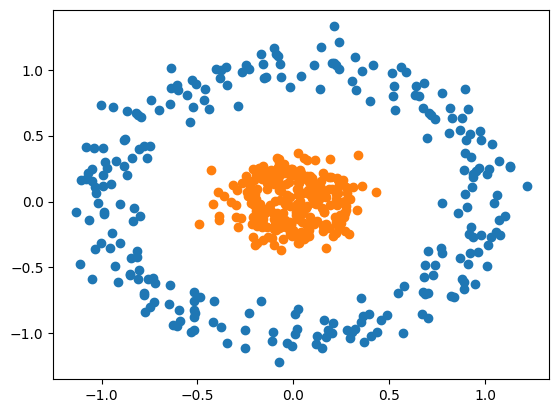

In [52]:
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])

In [53]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])


c:\Users\Zharb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [54]:
h = model.fit(x=X, y=Y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7426 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4400
Epoch 3/100
25/25 [==============================] - 0s 873us/step - loss: 0.6921 - accuracy: 0.6120
Epoch 4/100
25/25 [==============================] - 0s 997us/step - loss: 0.6913 - accuracy: 0.4320
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.6040
Epoch 6/100
25/25 [==============================] - 0s 956us/step - loss: 0.6897 - accuracy: 0.6800
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5680
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.6420
Epoch 9/100
25/25 [==============================] - 0s 914us/step - loss: 0.6844 - accuracy: 0.7100
Epoch 10/100
25/25 [==============================] - 0s 850us/step - loss: 0.6800 - accuracy: 0.5600

Text(0.5, 1.0, "['accuracy']")

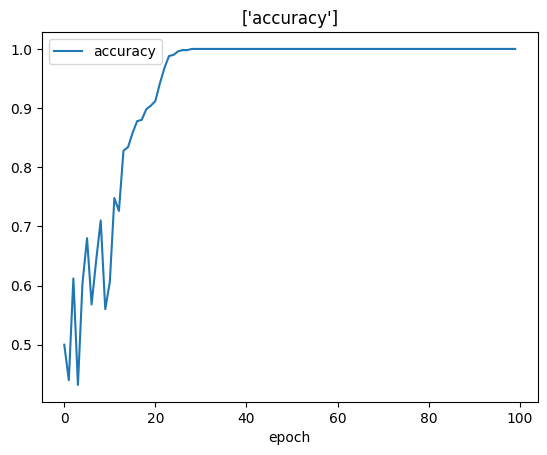

In [55]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title(['accuracy'])

Text(0.5, 1.0, "['loss']")

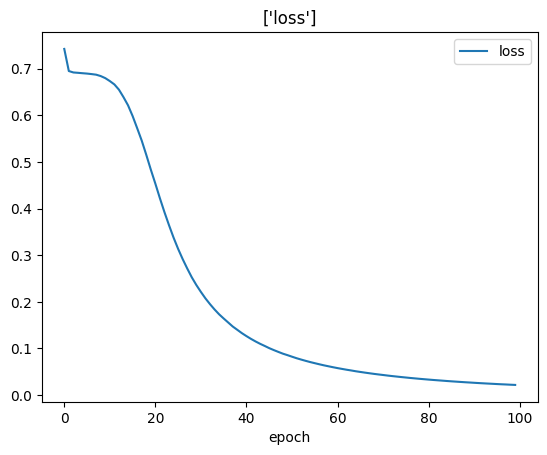

In [56]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title(['loss'])

In [57]:
def plot_decision_boundary(X, Y, model):
    x_span=np.linspace(min(X[:, 0])-0.25, max(X[:, 0])+0.25, 50)
    y_span=np.linspace(min(X[:, 1])-0.25, max(X[:, 1])+0.25, 50)
    xx, yy=np.meshgrid(x_span, y_span)
    xx_, yy_=xx.ravel(), yy.ravel()
    grid=np.c_[xx_, yy_]
    pred_func=model.predict(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 1ms/step


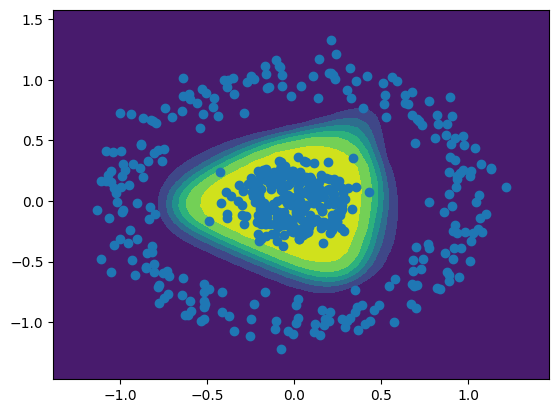

In [58]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 18ms/step
Prediction is:  [[0.02952232]]


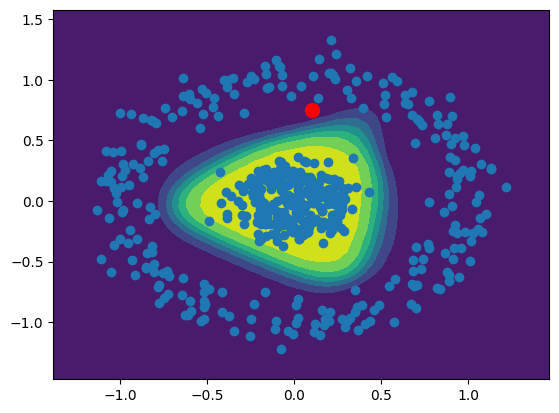

In [59]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x=0.1
y=0.75
point=np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ",prediction)